## Load the data, this can either be done by calling setup_PS_data.ipynb or by saving a .pkl file in this notebook and loading it here.
### Need to change the Vape paths and pkl_path in setup_PS_data.ipynb
#### Requires Vape https://github.com/neuromantic99/Vape

In [1]:
%%capture
%run setup_PS_data_multi.ipynb  # This notebook loads all data & some packages (takes a while)

In [2]:
sessions

{0: instance Mouse RL070, run 28 of Session class,
 1: instance Mouse RL070, run 29 of Session class,
 2: instance Mouse J048, run 27 of Session class,
 3: instance Mouse J048, run 28 of Session class,
 4: instance Mouse J048, run 29 of Session class,
 5: instance Mouse J048, run 30 of Session class,
 6: instance Mouse J048, run 32 of Session class,
 7: instance Mouse J064, run 10 of Session class,
 8: instance Mouse J064, run 11 of Session class,
 9: instance Mouse J064, run 14 of Session class,
 10: instance Mouse J063, run 8 of Session class,
 11: instance Mouse J063, run 9 of Session class,
 12: instance Mouse RL048, run 23 of Session class,
 13: instance Mouse RL048, run 24 of Session class,
 14: instance Mouse RL048, run 25 of Session class,
 15: instance Mouse RL048, run 28 of Session class,
 16: instance Mouse RL048, run 29 of Session class,
 17: instance Mouse J065, run 10 of Session class,
 18: instance Mouse J065, run 11 of Session class}

In [3]:
# Remove 5Hz data
sessions_30hz = {}
for idx, session in sessions.items():
    rep = repr(session)
    if 'J048' not in rep and 'RL048' not in rep:
        sessions_30hz[idx] = session

# Variable name too good not to use
sessions = sessions_30hz

In [4]:
session = sessions[1]
session.__dict__.keys()

dict_keys(['mouse', 'run_number', 'signature', 'pkl_path', 'name', 'run', 'pre_seconds', 'post_seconds', 'pre_gap_seconds', 'post_gap_seconds', 'verbose', 'shuffled_s1s2_labels_indicator', 'shuffled_trial_labels_indicator', 'flu', 'tstart_galvo', 'trial_start', 'galvo_ms', 'subsets', 'trial_subsets', 'n_stim_arr', 'outcome', 'outcome_arr', 'frequency', 'pre_frames', 'post_frames', 'art_gap_start', 'final_pre_gap_tp', 'art_gap_stop', 'filter_ps_array', 'filter_ps_time', 'behaviour_trials', 'unfiltered_n_cells', 'filtered_neurons', 'n_cells', 'av_ypix', 'av_xpix', 'plane_number', 's2_bool', 's1_bool', 'decision', 'photostim', 'photostim_occ', 'autorewarded', 'unrewarded_hits', 'n_unique_stims', 'n_neurons', 'n_times', 'n_trials', 'n_unique_dec', 'occ_table', 'n_com_trials', 'nonnan_trials'])

In [5]:
# Nice juicy fluoresence tensor [n_cells x n_trials x n_frames]
session.behaviour_trials.shape

(718, 261, 360)

In [6]:
# Did the animal lick, 1=hit or fp, 0=miss or cr.
decision = session.decision

# Was photostimulation delivered? 
# 2 = 'easy' trials = 150 cells stimulated 
# 1 = 'test' trials = (5,10,15,20,30,40 or 50) cells stimmed
# 0 = 'nogo' = no cells stimmed
photostim = session.photostim

# Test trials where the animal hit
test_hits = np.where((decision==1) & (photostim==1))[0]
test_hits

array([  7,  10,  17,  21,  25,  26,  38,  41,  44,  48,  50,  51,  53,
        55,  56,  59,  62,  63,  64,  67,  68,  72,  73,  76,  77,  80,
        82,  83,  88,  96, 101, 109, 110, 111, 115, 121, 136, 139, 140,
       143, 146, 155, 163, 166, 169])

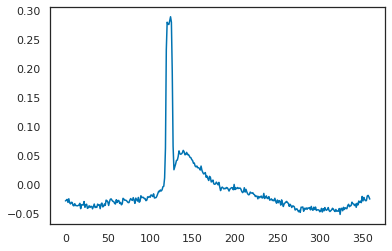

In [7]:
flu_test_hits = session.behaviour_trials[:, test_hits, :] 
plt.plot(np.mean(flu_test_hits, (0,1)))

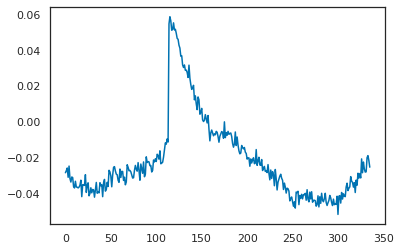

In [8]:
# Filter out the ps artifact
ps_filtered = flu_test_hits[:, :, session.filter_ps_array]
plt.plot(np.mean(ps_filtered, (0,1)))

In [1]:
session.

NameError: name 'session' is not defined